In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as pyplot             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/PP56/Data/water_potability.csv')

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [12]:
print(list(df))

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [13]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
from scipy.stats import skew

# Calculate skewness for each variable
skewness = df.apply(skew)

# Print the skewness values
print(skewness)

ph                      NaN
Hardness          -0.039324
Solids             0.621350
Chloramines       -0.012093
Sulfate                 NaN
Conductivity       0.264369
Organic_carbon     0.025521
Trihalomethanes         NaN
Turbidity         -0.007813
Potability         0.450577
dtype: float64


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

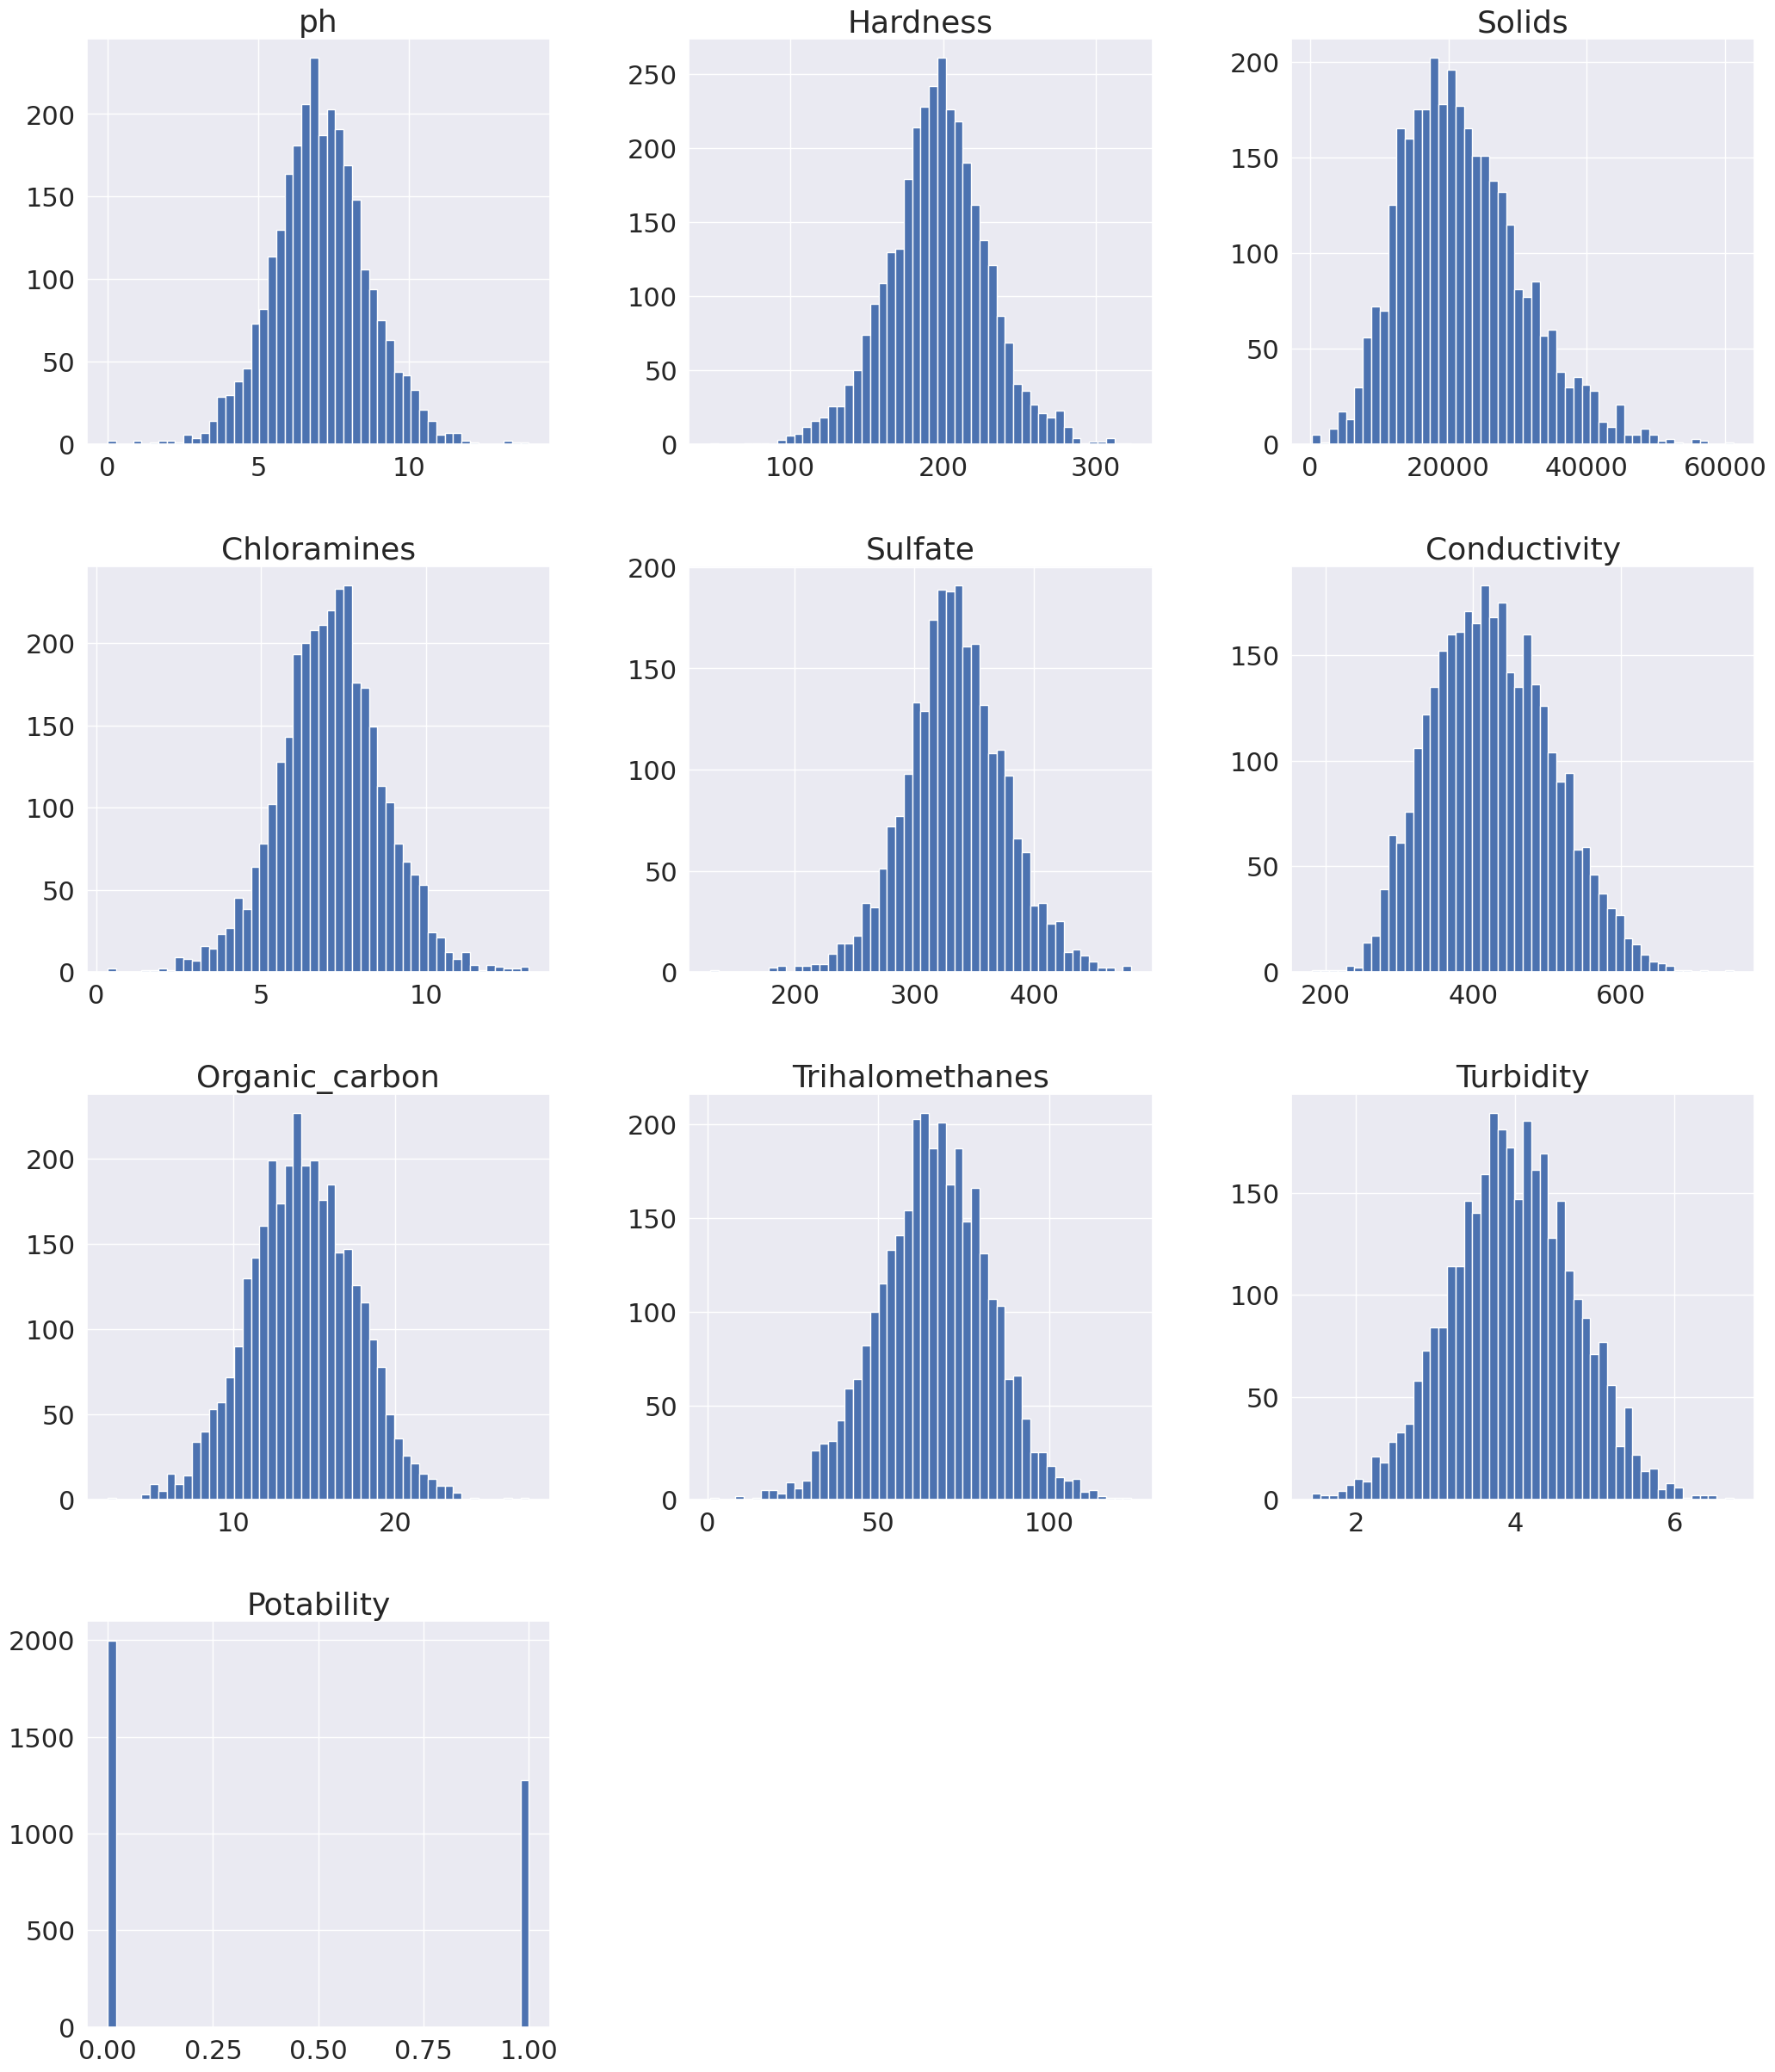

In [15]:
params = {'axes.titlesize':'26',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
pyplot.rcParams.update(params)

df.hist(figsize=(25, 30), bins=50, xlabelsize=22, ylabelsize=22)

In [10]:
!pip install matplotlib==3.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.3.0-cp310-cp310-linux_x86_64.whl size=11718679 sha256=2e9c47b75f35089397f4528c62dc480291a37e360d85a95b023396f3f0bc23f0
  Stored in directory: /root/.cache/pip/wheels/25/3b/e0/fd15c7db383a885d7ce65d854b562f790f57e682b4dffc615e
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.9.2 requires matplotlib>=3.5.0, but you have matplotlib 3.3.0 which is incompatible.
plotnine 0.12.2 requires matplotlib>=3.6.0, but you have matplotlib 3.3.0 which is incompatible.


Text(0.8, 1500, 'Safe for Human consumption')

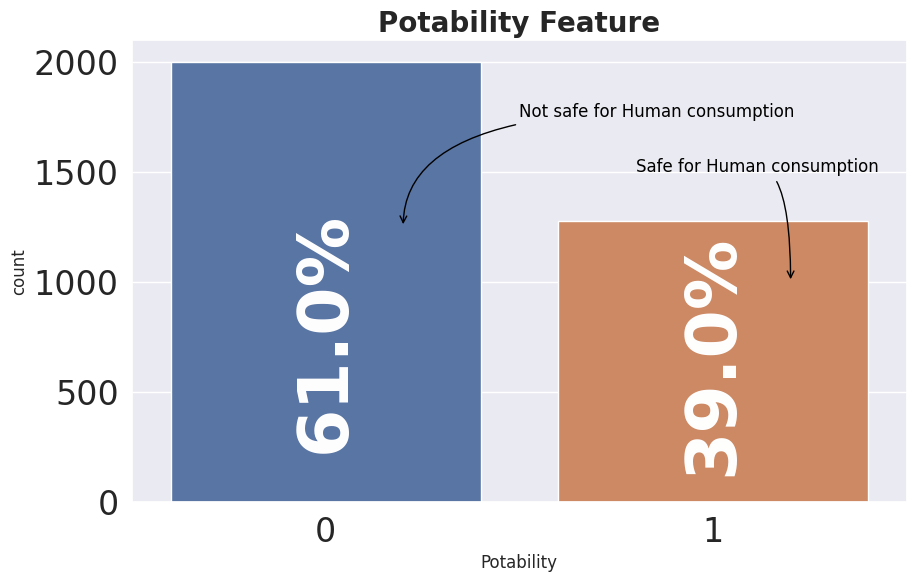

In [17]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750), xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

In [18]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

IndexError: ignored

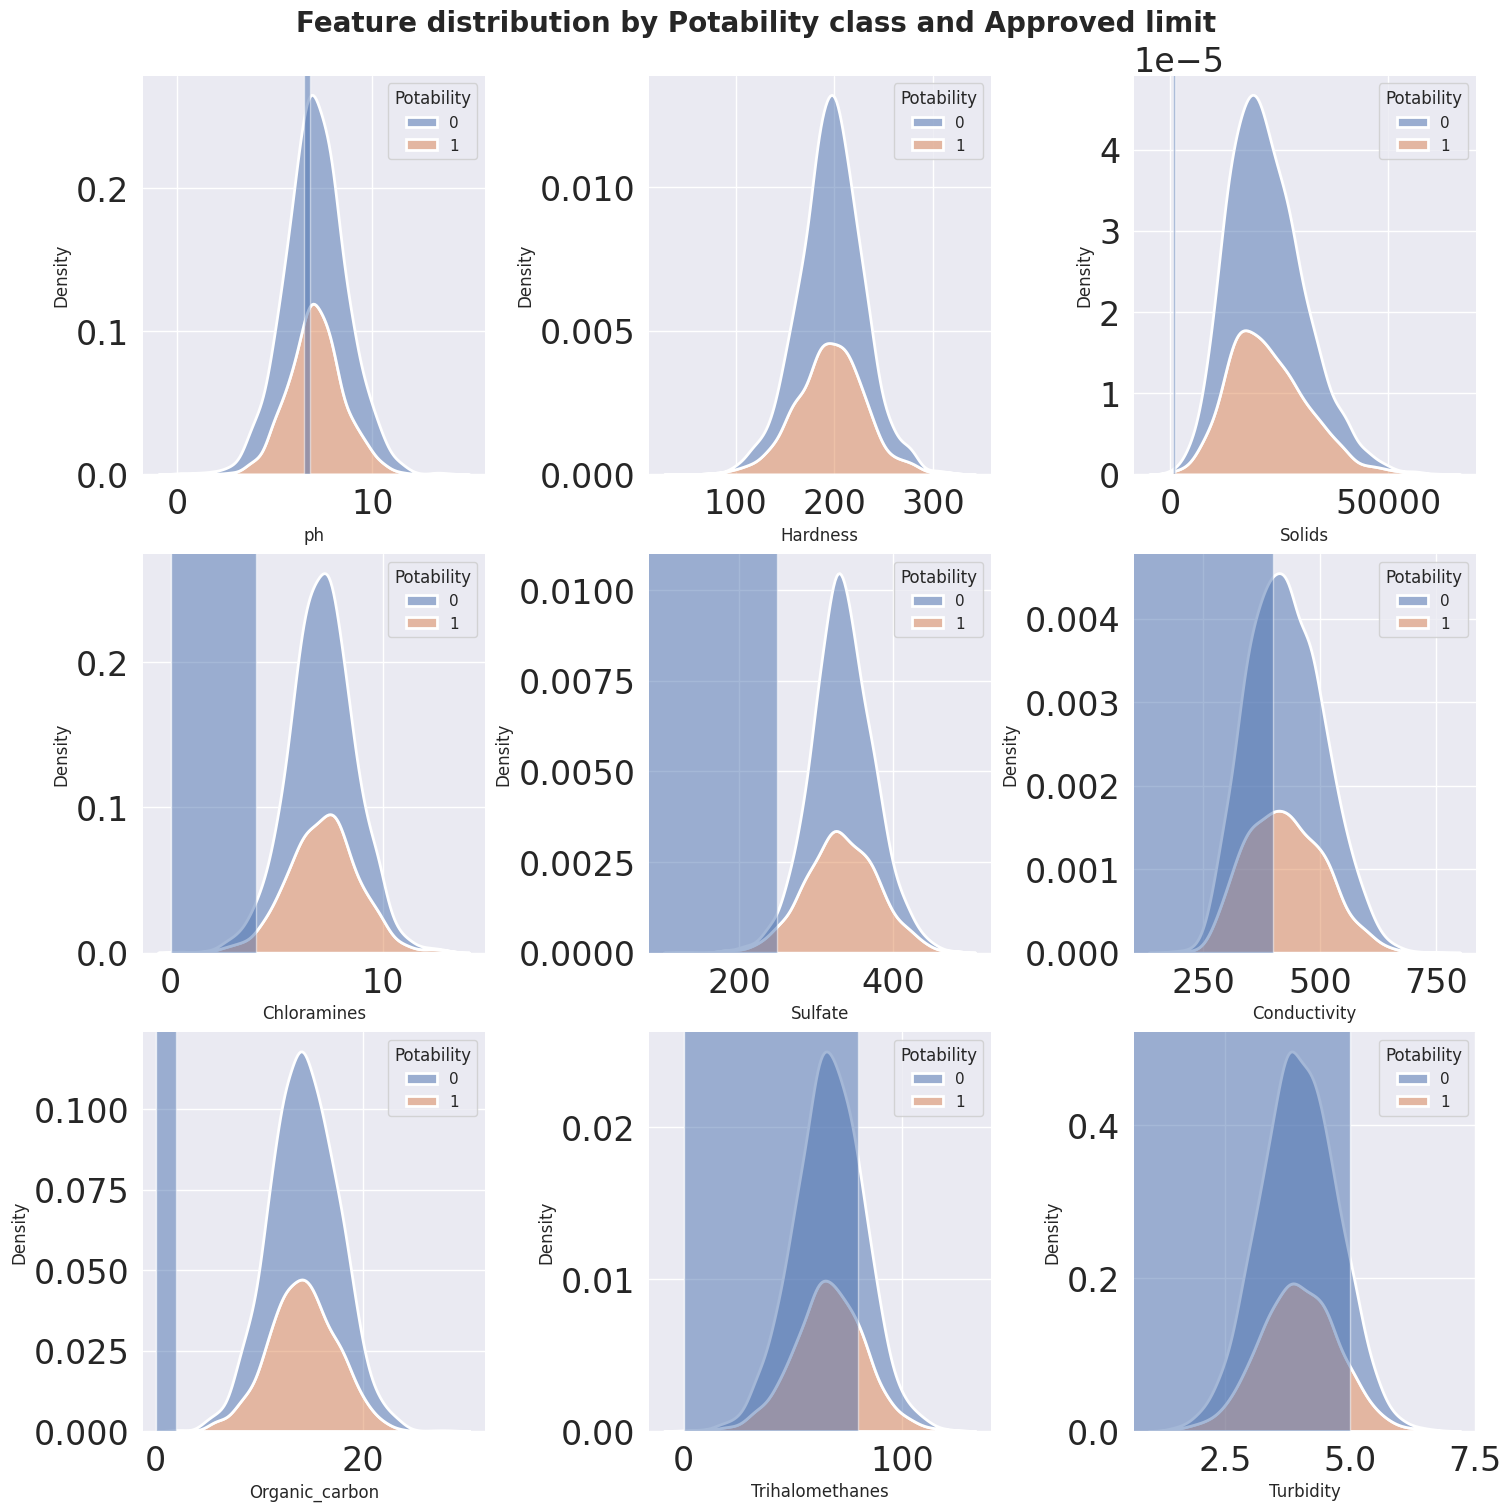

In [19]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

IndexError: ignored

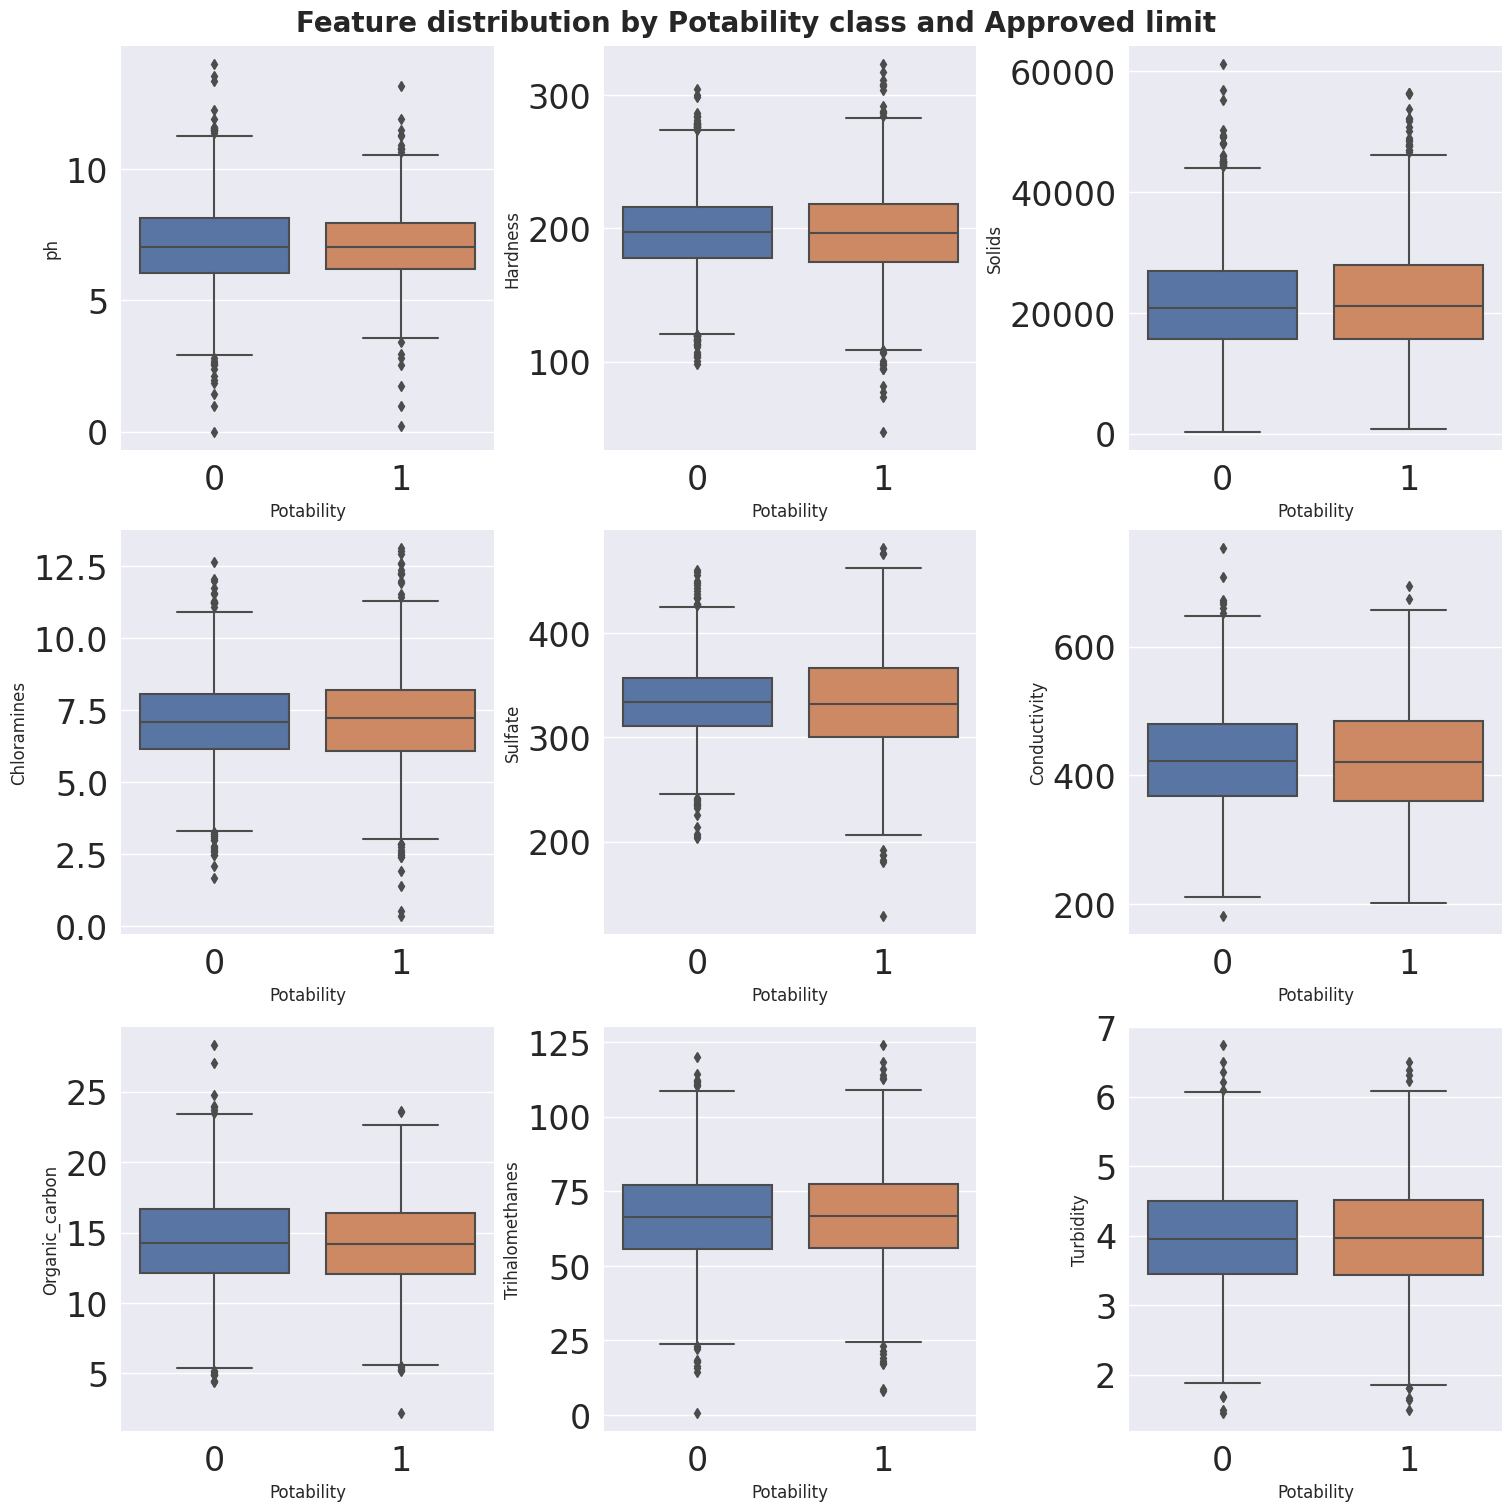

In [20]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

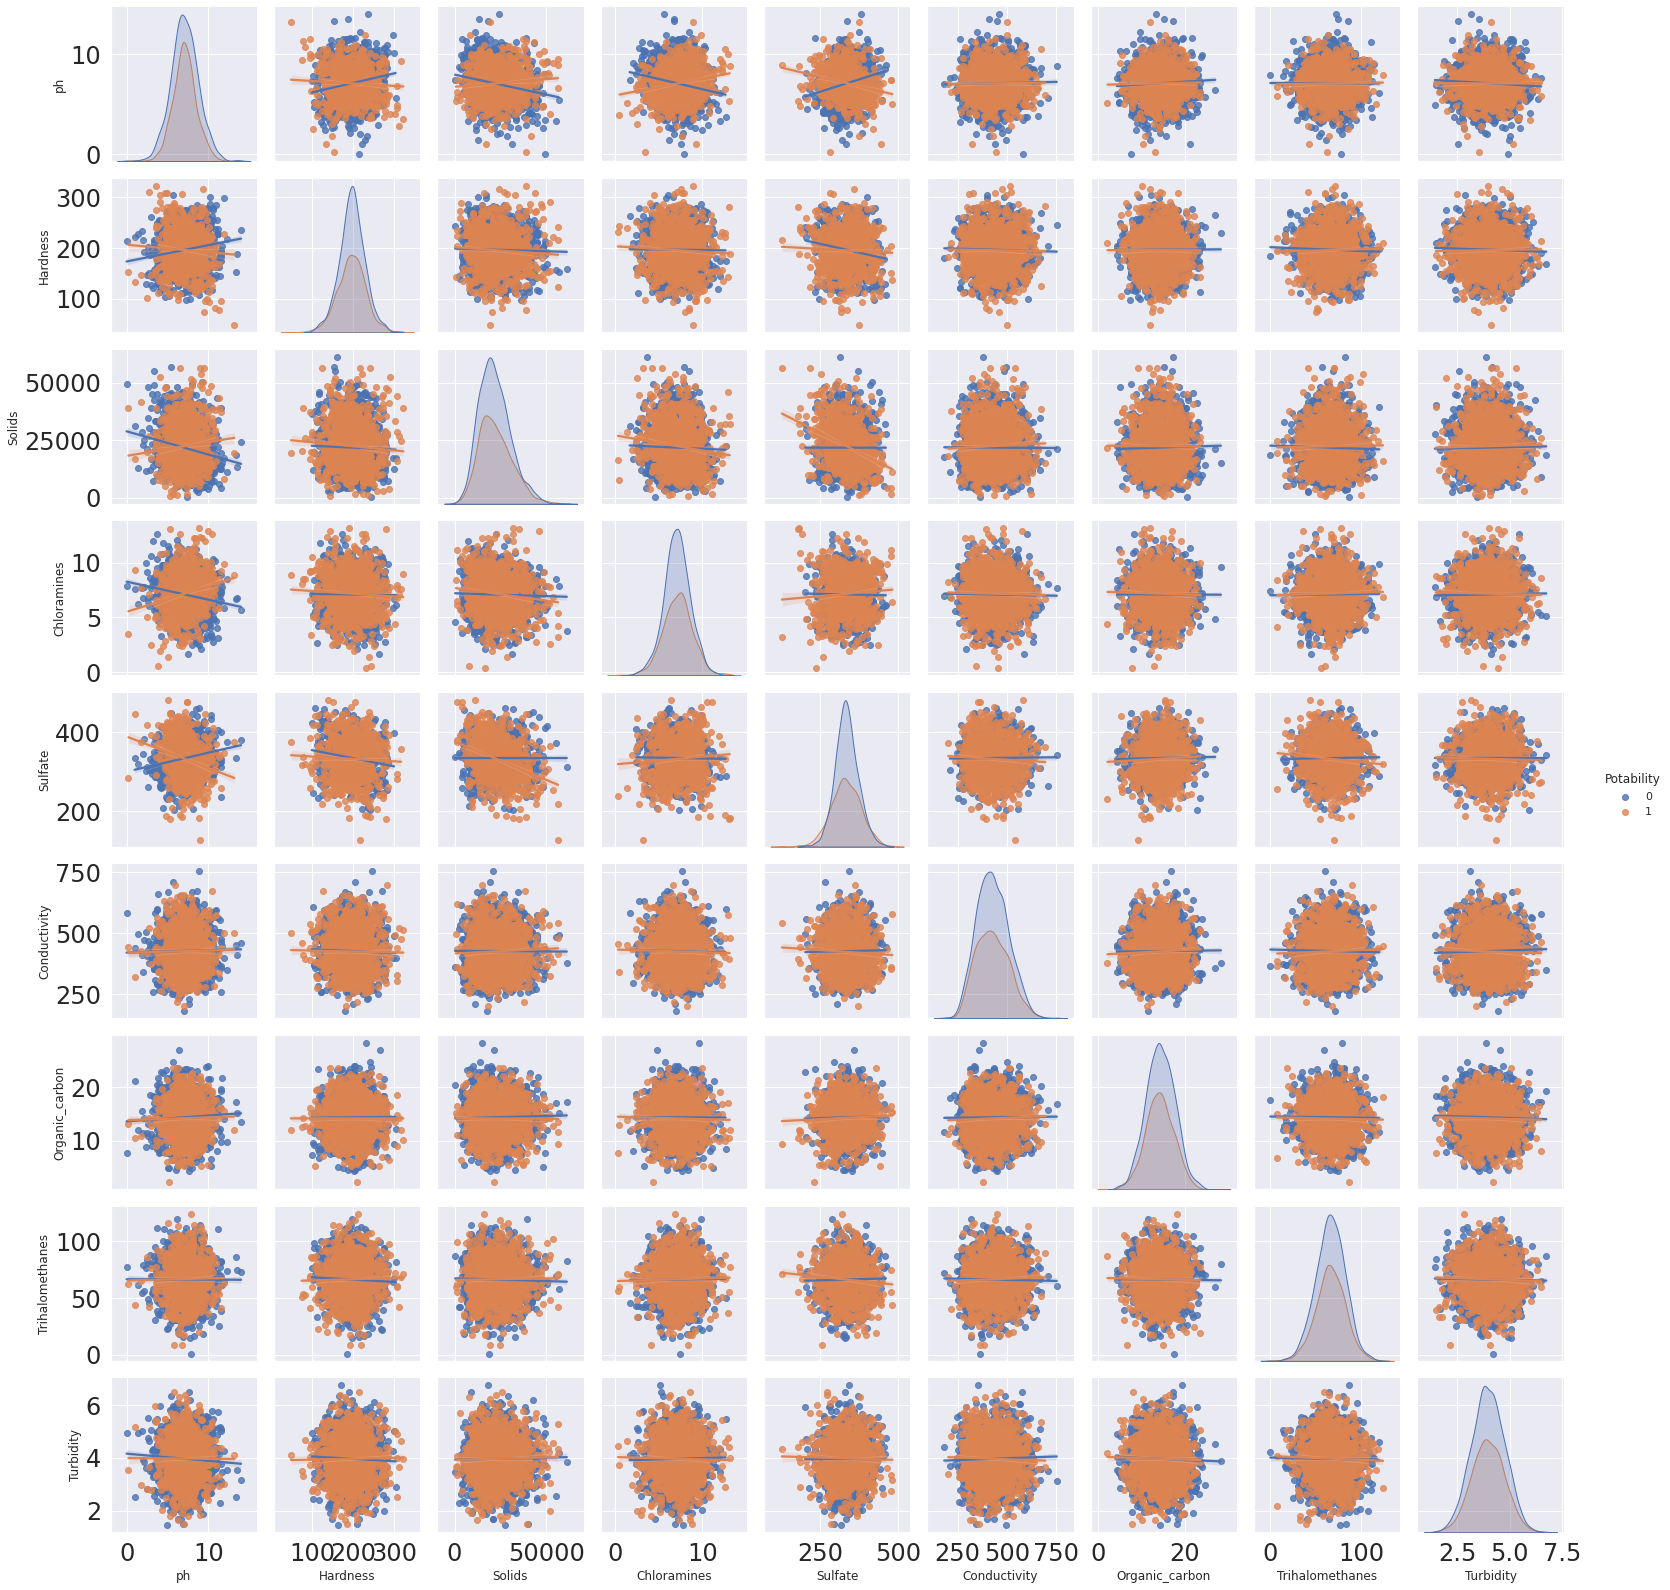

In [ ]:
sns.pairplot(df, hue='Potability', kind='reg')

Hypothesis testing

p_value for ph is nan we accept the null hypothesis
p_value for Hardness is 0.42854158703979384 we accept the null hypothesis
p_value for Solids is 0.05346363820392201 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022450390112 we accept the null hypothesis
p_value for Sulfate is nan we accept the null hypothesis
p_value for Conductivity is 0.6418845484669666 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746151346233 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is nan we accept the null hypothesis
p_value for Turbidity is 0.9279391626783621 we accept the null hypothesis
p_value for Potability is 0.0 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis


Text(6, 0.12, 'Significance level: 0.1')

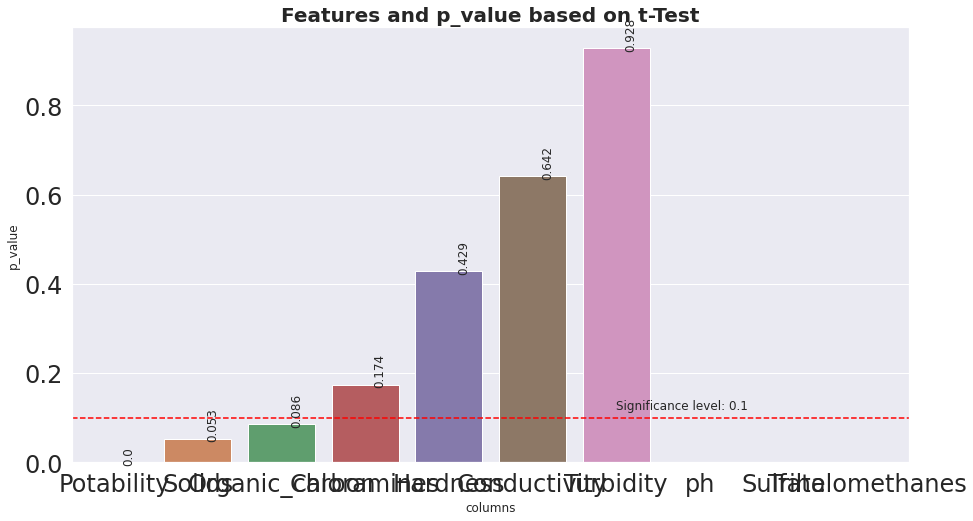

In [ ]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

In [21]:
print(list(df))

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [22]:
numeric_features=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Text(0.5, 0.98, 'Visualizing continuous columns (df dataset)')

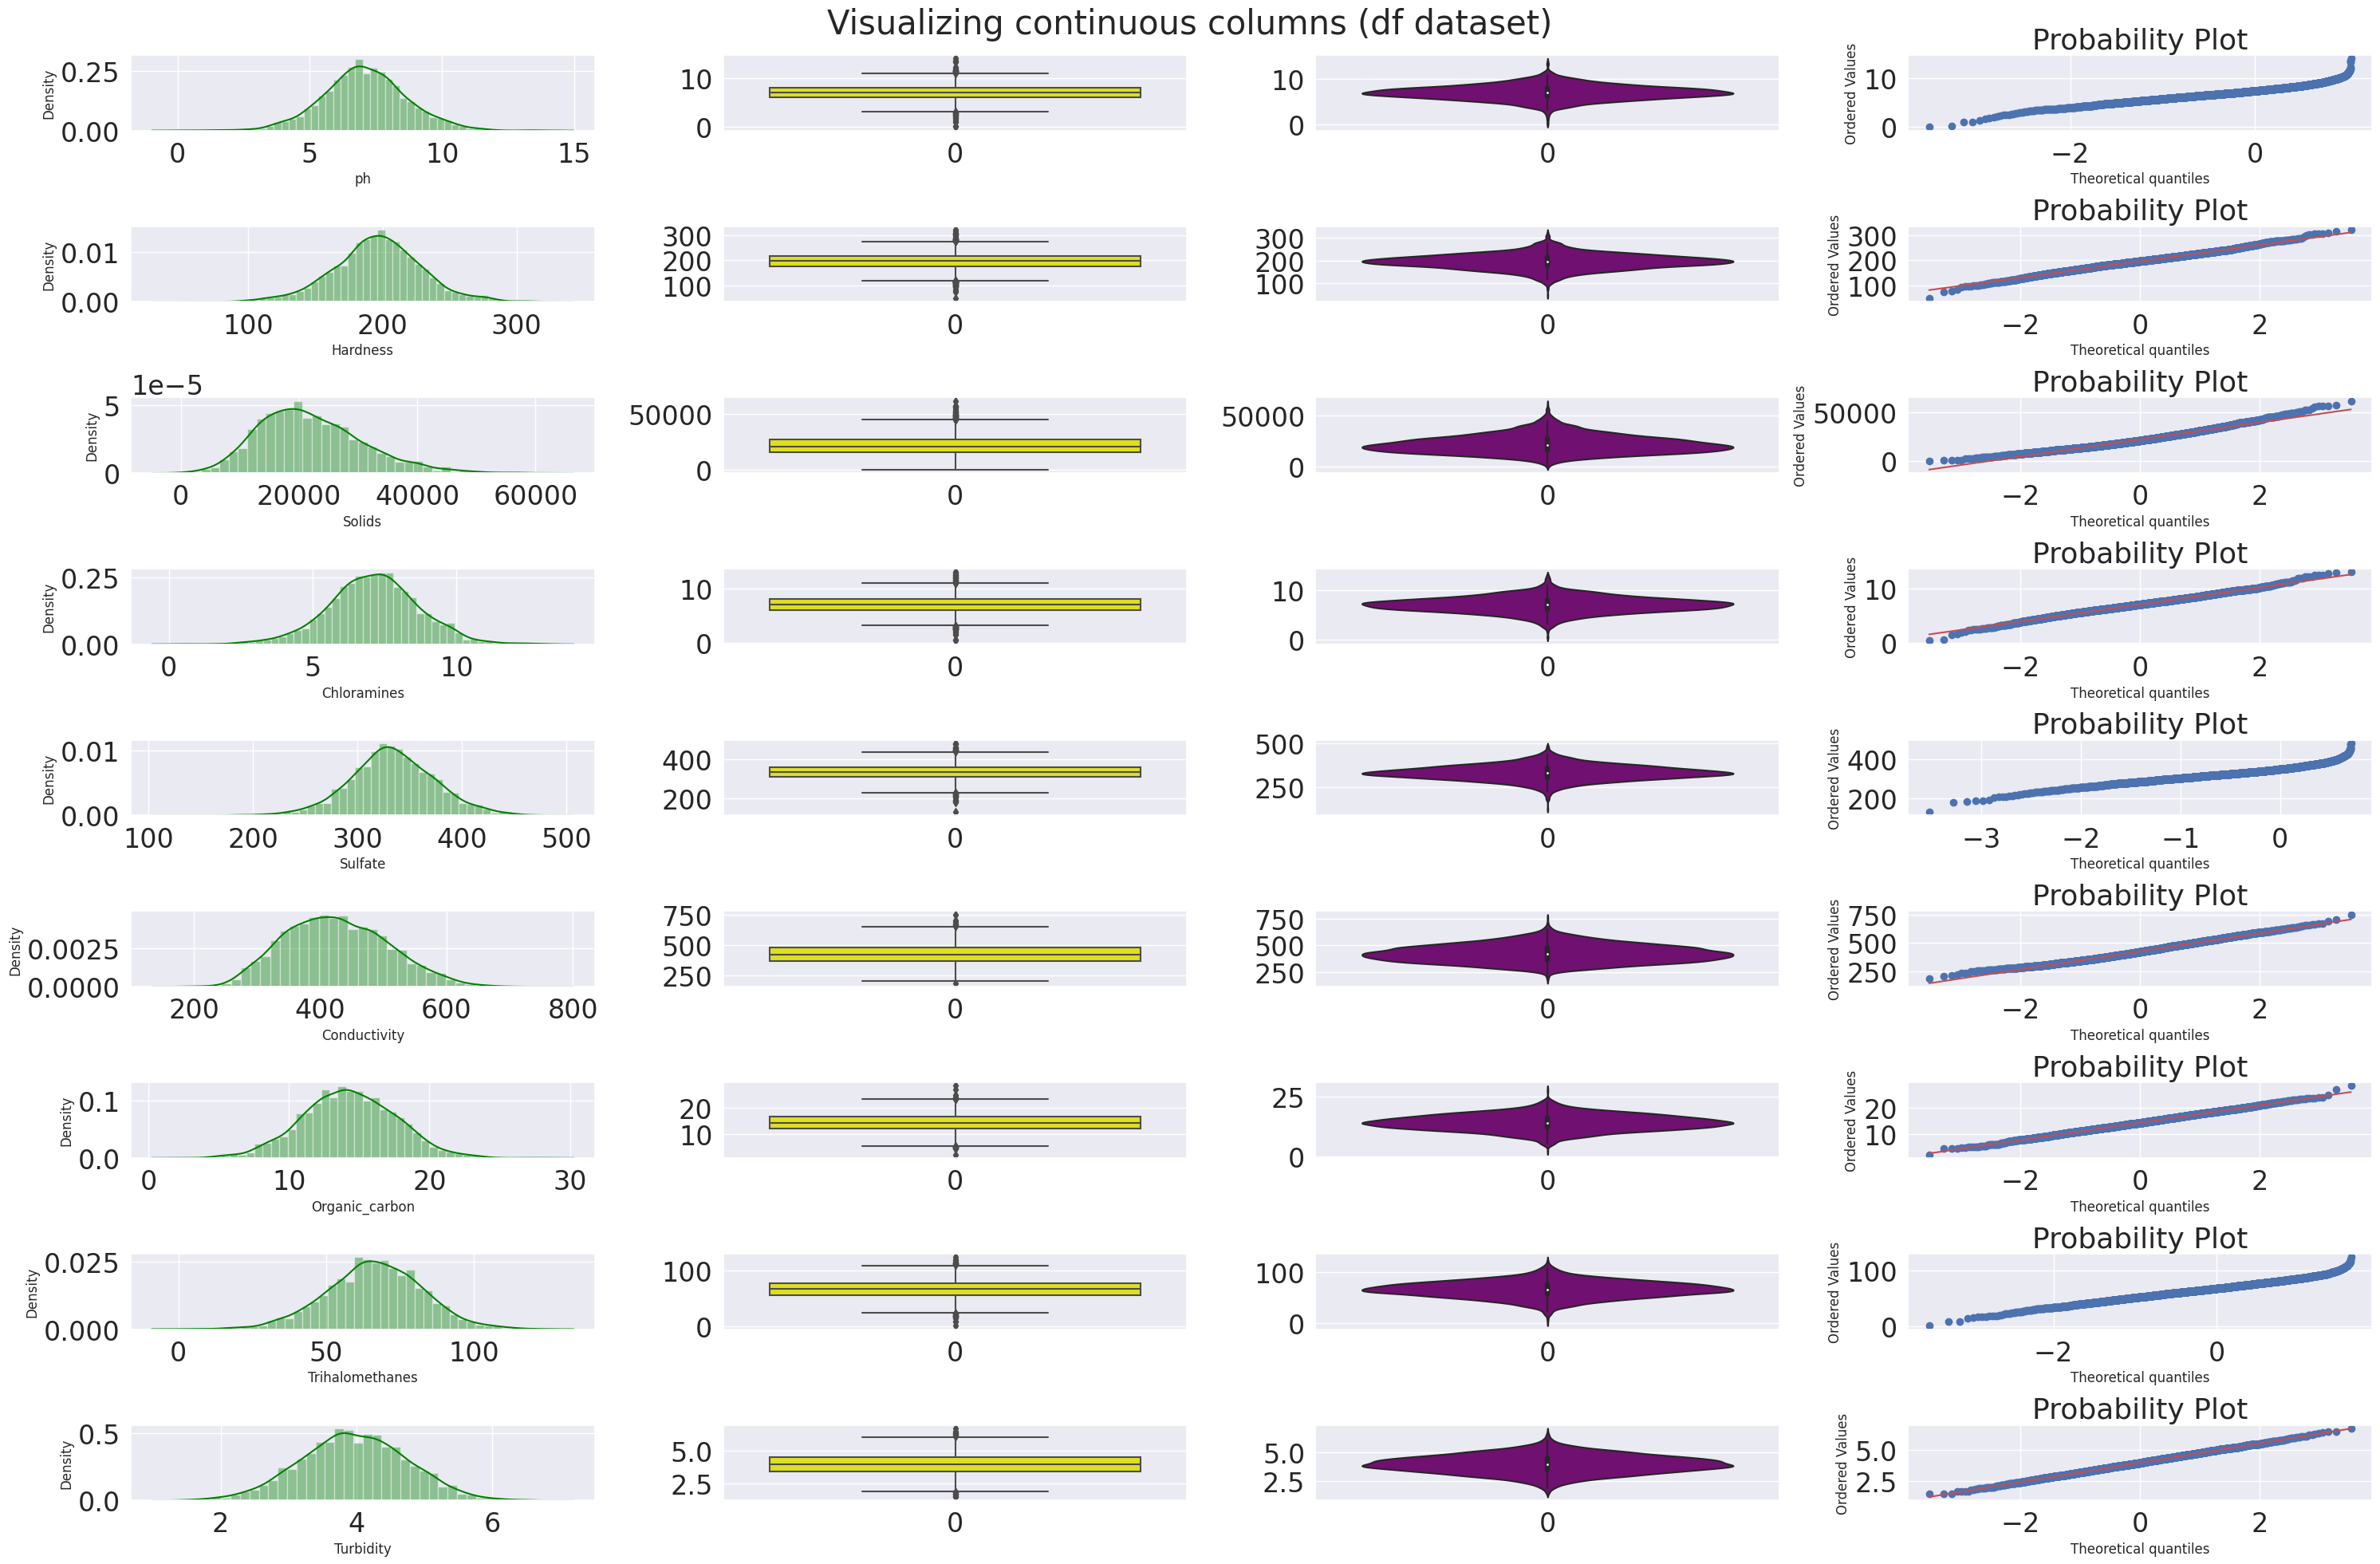

In [23]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,3])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (df dataset)",fontsize=30)

Correlation

<ipython-input-52-5d3d0bb2bdb7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

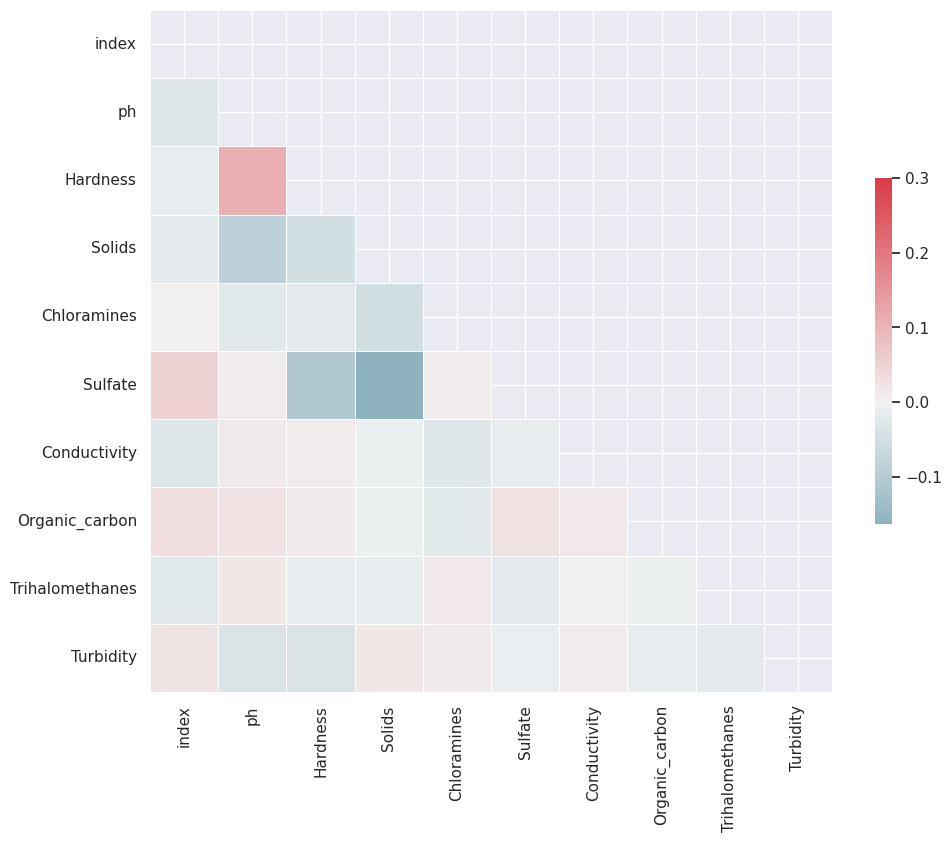

In [ ]:
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Engineering

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

In [ ]:
print(list(df))

['index', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [ ]:
X = df.drop(columns='Potability', axis=1)
y = df.Potability.values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#ML Classification

##LR

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

Model training

In [ ]:
# all parameters not specified are set to their defaults
LR = LogisticRegression()
scaler = StandardScaler()
lr = LogisticRegression()
model_LR = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model_LR.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

Performance evaluation

In [ ]:
y_train_hat = model_LR.predict(X_train)
y_test_hat = model_LR.predict(X_test)

#y_train_hat_probs = model_LR.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
#train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
#print('Training AUC: %.4f %%' % train_auc_roc)

Confusion matrix:
 [[820  74]
 [538  76]]
Training accuracy: 59.4164 %


In [ ]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_train, y_train_hat), jaccard_score(y_train, y_train_hat))

0.19895287958115182 0.11046511627906977


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.621681  0.918301  0.741425       306
           1   0.509804  0.131980  0.209677       197

    accuracy                       0.610338       503
   macro avg   0.565743  0.525140  0.475551       503
weighted avg   0.577865  0.610338  0.533166       503



Hyperparameters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Define the hyperparameters to tune
param_grid = {
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__C': [0.1, 1.0, 10.0],
    'log_reg__solver': ['liblinear', 'saga'],
}

# Create the pipeline with standardization and logistic regression
scaler = StandardScaler()
lr = LogisticRegression()
model_LR = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model_LR, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model on the test set
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

## SVM

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.6064


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.6064


In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_train, y_train_hat), jaccard_score(y_test, y_pred))

0.19895287958115182 0.0


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.6064


With linear kernel

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.5944


With polynomial kernel

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.5825


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=poly_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=poly_svc.classes_)

In [ ]:
disp.plot()

## SGD

Model training

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Always scale the input. The most convenient way is to use a pipeline.
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Performance evaluation

In [ ]:
y_test_hat = sgd.predict(X_test)
#y_test_hat_probs = sgd.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
#print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[248  44]
 [178  33]]
Training accuracy: 55.8648 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.582160  0.849315  0.690808       292
           1   0.428571  0.156398  0.229167       211

    accuracy                       0.558648       503
   macro avg   0.505366  0.502857  0.459987       503
weighted avg   0.517732  0.558648  0.497157       503



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.4677060133630289 0.30523255813953487


## KNN

Model training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Performance evaluation

In [ ]:
y_test_hat = knn.predict(X_test)
#y_test_hat_probs = knn.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
#print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[224  87]
 [101  91]]
Training accuracy: 62.6243 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.689231  0.720257  0.704403       311
           1   0.511236  0.473958  0.491892       192

    accuracy                       0.626243       503
   macro avg   0.600233  0.597108  0.598147       503
weighted avg   0.621288  0.626243  0.623285       503



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.4918918918918919 0.32616487455197135


## GPC

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)

In [ ]:
gpc = make_pipeline(StandardScaler(), GaussianProcessClassifier(kernel=kernel, random_state=0))
gpc.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
y_test_hat = gpc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_hat)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[264  47]
 [ 98  94]]
Training accuracy: 71.1730 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.729282  0.848875  0.784547       311
           1   0.666667  0.489583  0.564565       192

    accuracy                       0.711730       503
   macro avg   0.697974  0.669229  0.674556       503
weighted avg   0.705381  0.711730  0.700577       503



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.5645645645645645 0.39330543933054396


Hyperparameteres training

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the hyperparameter grid
param_grid = {
    'gaussianprocessclassifier__kernel': [1.0 * RBF(length_scale) for length_scale in [0.1, 1.0, 10.0]],
}

# Create the pipeline with StandardScaler and GaussianProcessClassifier
gpc = make_pipeline(StandardScaler(), GaussianProcessClassifier(random_state=0))

# Perform grid search
grid_search = GridSearchCV(gpc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: Convergenc

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussianprocessclassifier',
                 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1),
                                           random_state=0))])

In [ ]:
print(grid_search.best_params_)

{'gaussianprocessclassifier__kernel': 1**2 * RBF(length_scale=1)}


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

Model training

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
gnb = make_pipeline(StandardScaler(), GaussianNB())
gnb.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Performance evaluation

In [ ]:
y_test_hat = gnb.predict(X_test)
#y_test_hat_probs = gnb.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
#print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[253  58]
 [143  49]]
Training accuracy: 60.0398 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.638889  0.813505  0.715700       311
           1   0.457944  0.255208  0.327759       192

    accuracy                       0.600398       503
   macro avg   0.548416  0.534357  0.521730       503
weighted avg   0.569820  0.600398  0.567619       503



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.32775919732441466 0.196


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model training

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
DT = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0))
DT.fit(X_train, y_train)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('sgdclassifier', SGDClassifier())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

In [ ]:
y_test_hat = DT.predict(X_test)
#y_test_hat_probs = DT.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
#print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[289   3]
 [  1 210]]
Training accuracy: 99.2048 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.996552  0.989726  0.993127       292
           1   0.985915  0.995261  0.990566       211

    accuracy                       0.992048       503
   macro avg   0.991234  0.992493  0.991847       503
weighted avg   0.992090  0.992048  0.992053       503



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.9905660377358492 0.9813084112149533


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline with the Decision Tree Classifier
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Define the hyperparameters and their possible values
param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_test_hat = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_hat) * 100

# Print the results
print("Best hyperparameters:", best_params)
print("Test accuracy: %.4f %%" % test_accuracy)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model training

In [ ]:
RF = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10))
RF.fit(X_train, y_train)

Performance evaluation

In [ ]:
y_test_hat = RF.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_hat)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[284   8]
 [ 28 183]]
Training accuracy: 92.8429 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.910256  0.972603  0.940397       292
           1   0.958115  0.867299  0.910448       211

    accuracy                       0.928429       503
   macro avg   0.934186  0.919951  0.925423       503
weighted avg   0.930332  0.928429  0.927834       503



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.9104477611940298 0.8356164383561644


Hyperparameter tuning

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Create the pipeline with StandardScaler and RandomForestClassifier
RF = make_pipeline(StandardScaler(), RandomForestClassifier())

# Define the hyperparameter grid for tuning
param_grid = {
    'randomforestclassifier__n_estimators': [10, 50, 100],  # Number of trees
    'randomforestclassifier__max_depth': [None, 5, 10],  # Maximum depth of trees
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf nodes
    'randomforestclassifier__max_features': ['auto', 'sqrt']  # Number of features to consider
}

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(RF, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the model with the best parameters
RF.set_params(**best_params)
RF.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_test_hat = RF.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_hat) * 100

print("Best parameters:", best_params)
print("Best score:", best_score)
print("Test accuracy: %.4f %%" % test_accuracy)

##XGBoost

Model training

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Prepare the data with features X and target variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Set the desired hyperparameters (e.g., learning rate, max depth, number of estimators)
xgb_classifier.set_params(learning_rate=0.1, max_depth=3, n_estimators=100)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Performance evaluation

In [ ]:
y_test_hat = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_hat)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[229   2]
 [  1 171]]
Training accuracy: 99.2556 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.995652  0.991342  0.993492       231
           1   0.988439  0.994186  0.991304       172

    accuracy                       0.992556       403
   macro avg   0.992046  0.992764  0.992398       403
weighted avg   0.992574  0.992556  0.992559       403



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.991304347826087 0.9827586206896551


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the XGBoost classifier with the best parameters
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

# Evaluate the tuned model on the test set
y_pred = xgb_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Print the best parameters, best score, and test accuracy
print("Best parameters:", best_params)
print("Best score:", best_score)
print("Test accuracy: %.2f%%" % test_accuracy)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1.0}
Best score: 0.9931638319691956
Test accuracy: 99.50%


##Stacked Ensemble Method

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the individual classifiers
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Create the stacked ensemble model
estimators = [('random_forest', rf), ('xgboost', xgb)]
ensemble = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

# Train the stacked ensemble model
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model on the test set
y_pred = ensemble.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Print the test accuracy
print("Test accuracy: %.2f%%" % test_accuracy)

Test accuracy: 99.26%


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
mlp = make_pipeline(StandardScaler(), MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
mlp.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [ ]:
y_test_hat = mlp.predict(X_test)
#y_test_hat_probs = mlp.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
#test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
#print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[151 160]
 [ 56 136]]
Training accuracy: 57.0577 %


In [ ]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.729469  0.485531  0.583012       311
           1   0.459459  0.708333  0.557377       192

    accuracy                       0.570577       503
   macro avg   0.594464  0.596932  0.570194       503
weighted avg   0.626403  0.570577  0.573227       503



In [ ]:
#calculate F1 score and Jaccard Similarity Matrix
print(f1_score(y_test, y_test_hat), jaccard_score(y_test, y_test_hat))

0.5573770491803279 0.38636363636363635


#Feature Importance

In [ ]:
# Drop columns by their names
columns_to_drop = ['index']
df = df.drop(columns_to_drop, axis=1)

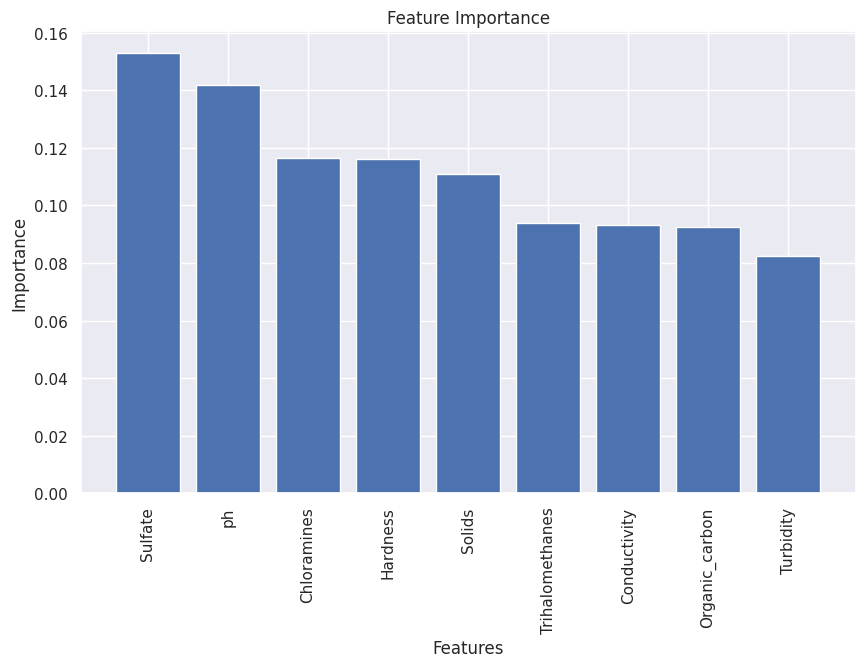

In [ ]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()